Intercept (b0): 7.173913043478279
Coefficients (b1, b2, b3): [0.0326087  3.91304348 0.32608696]


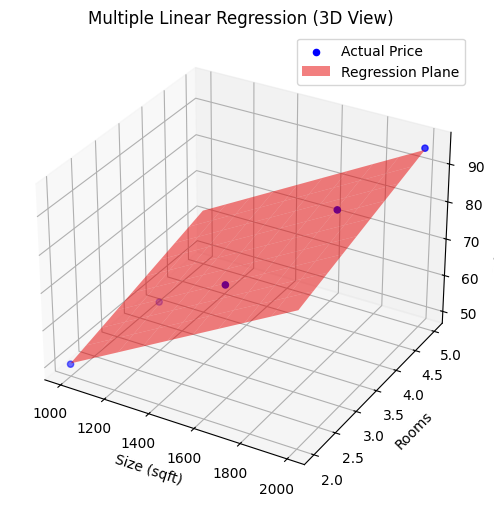

In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Input Data
X = np.array([
    [1000, 2, 7],
    [1500, 3, 8],
    [1800, 4, 9],
    [1200, 3, 6],
    [2000, 5, 10]
])

# Target: Price in lakhs
y = np.array([50, 70, 85, 60, 95])

# Step 2: Train the model
model = LinearRegression()
model.fit(X, y)

# Step 3: Coefficients
print("Intercept (b0):", model.intercept_)
print("Coefficients (b1, b2, b3):", model.coef_)

# Step 4: Visualization (Use only two features for plotting: Size and Rooms)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Extracting features for 3D plotting
x1 = X[:, 0]  # Size
x2 = X[:, 1]  # Rooms
z = y         # Price

# Plot original data points
ax.scatter(x1, x2, z, color='blue', label='Actual Price')

# Create grid for prediction surface
x1_grid, x2_grid = np.meshgrid(
    np.linspace(min(x1), max(x1), 10),
    np.linspace(min(x2), max(x2), 10)
)
x3_fixed = 8  # Fixing location rating for visualization

# Flatten and prepare data for prediction
X_grid = np.c_[x1_grid.ravel(), x2_grid.ravel(), np.full(x1_grid.size, x3_fixed)]
z_pred = model.predict(X_grid).reshape(x1_grid.shape)

# Plot prediction surface
ax.plot_surface(x1_grid, x2_grid, z_pred, color='red', alpha=0.5, label='Regression Plane')

# Labels and title
ax.set_xlabel('Size (sqft)')
ax.set_ylabel('Rooms')
ax.set_zlabel('Price (in lakhs)')
ax.set_title('Multiple Linear Regression (3D View)')

plt.legend()
plt.show()
